In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import cv2

###  Placing and Image on top of other

In [ ]:
img1 = cv2.imread("travis.jpg")
img2 = cv2.imread("weeknd.jfif")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [ ]:
large_img = cv2.resize(img1, (1024, 1024))
small_img = img2

print(img1.shape)
print(img2.shape)

(682, 1024, 3)
(300, 474, 3)


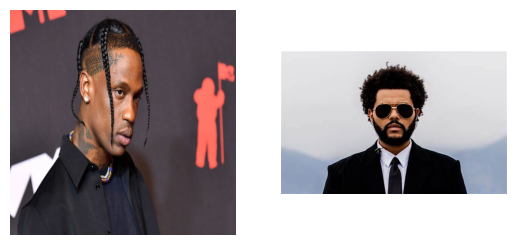

In [ ]:
plt.subplot(1,2,1), plt.imshow(large_img), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(small_img), plt.axis("off")
plt.show()

- Placing smaller image on the larger Image

In [ ]:
x_offset, y_offset = 0, 0     # Column and Row Indices respectively

In [ ]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7893a853e650>)

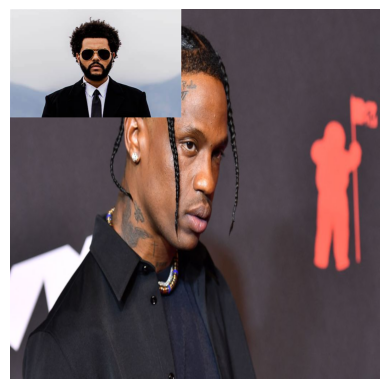

In [ ]:
plt.axis("off"), plt.imshow(large_img)

### Masking and Blending Manually

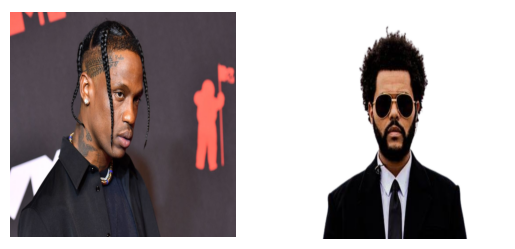

In [ ]:
img1 = cv2.imread("travis.jpg")
img2 = cv2.imread("/content/weeknd-removebg-preview.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (600, 610))


plt.subplot(1,2,1), plt.imshow(img1), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(img2), plt.axis("off")
plt.show()

In [ ]:
print(img1.shape)
print(img2.shape)

(1200, 1200, 3)
(610, 600, 3)


- Getting the position where we should place the smaller image on bigger image (here, bottom-right corner)

In [ ]:
x_offset = 1200-600
y_offset = 1200-610

- Creating ROI of same shape, where we will be placing our smaller image

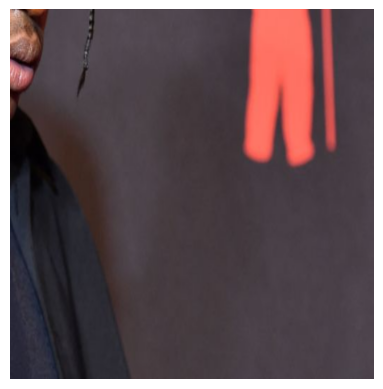

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939dd40af0>, None)

In [ ]:
rows, cols, chans = img1.shape

roi = img1[y_offset:1200, x_offset:1200]

plt.axis("off"), plt.imshow(roi), plt.show()

- Convert Image to Greyscale

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


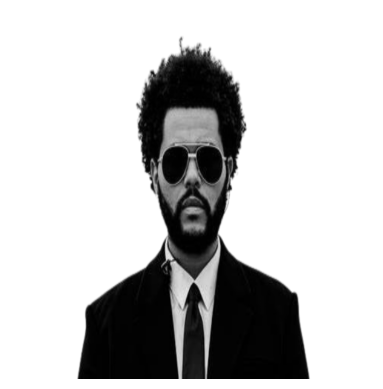

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939dcf6800>, None)

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

print(img2_gray)

plt.axis("off"), plt.imshow(img2_gray, cmap="gray"), plt.show()

- Invert the Greyscale Image - Done to achieve Transparacy

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


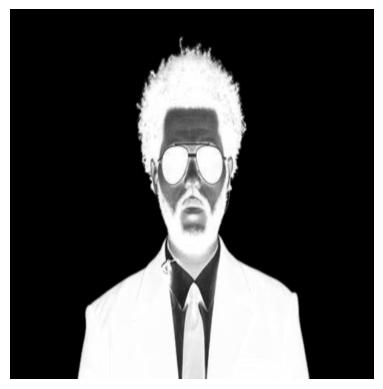

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939dac8250>, None)

In [ ]:
mask_iv = cv2.bitwise_not(img2_gray)

print(mask_iv)

plt.axis("off"), plt.imshow(mask_iv, cmap="gray"), plt.show()

- Create White Background with dimension of smaller Image

In [ ]:
# Return a new array of given shape and type, filled with fill_value.

white_background = np.full(img2.shape, 255, dtype=np.uint8)     # uint8: unsigned integer

print(white_background.shape)

(610, 600, 3)


- Apply Mask to the Background

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939dc99ff0>)

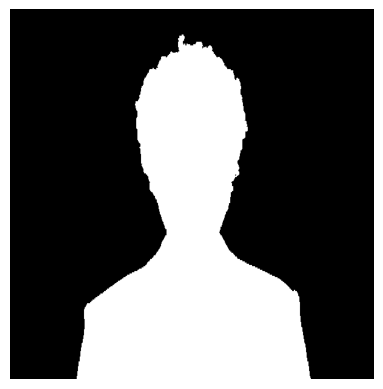

In [ ]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_iv)

print(bk[0])

plt.axis("off"), plt.imshow(bk)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939d9fe320>)

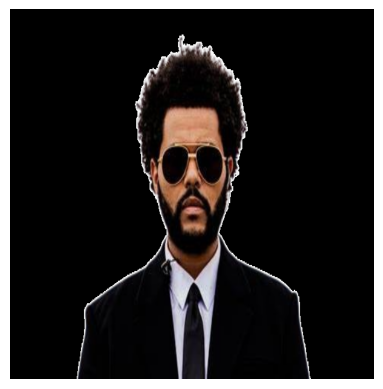

In [ ]:
foreg = cv2.bitwise_or(img2, img2, mask=mask_iv)

print(foreg[0])

plt.axis("off"), plt.imshow(foreg, cmap="gray")

- Applying ROI (extracted from larger image) and foreground (from smaller image)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939db40490>)

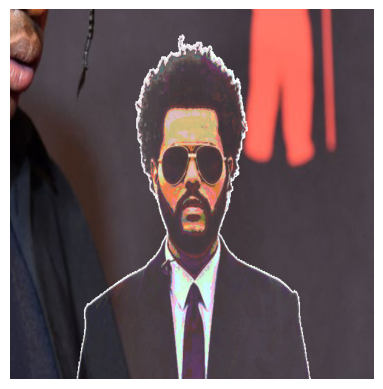

In [ ]:
final_roi = cv2.bitwise_or(roi, foreg)

plt.axis("off"), plt.imshow(final_roi)

- Overall Output

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x78939db1b370>)

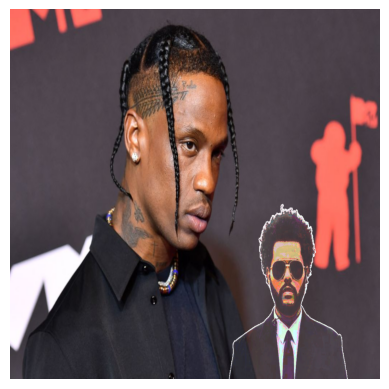

In [ ]:
img1[y_offset:1200, x_offset:1200] = final_roi

plt.axis("off"), plt.imshow(img1)